<a href="https://colab.research.google.com/github/jjaquezrd/DATA_SCIENCE/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

In [3]:
Opcion1 = '/content/drive/MyDrive/Data_Science/DataSet/Fraud.csv'
opcion2 = '/content/drive/MyDrive/Data_Science/DataSet/diabetes_data.csv'

In [24]:
df1 = pd.read_csv(Opcion1)
df2 = pd.read_csv(opcion2)

# Primera opción: conjunto de datos 1

1. Fuente de datos
* https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

2.  Breve descripción de datos
* set de datos para predecir transacciones fraudulentas para una companian financiera. Data disponible en formato csv. 6362620 filas y 10 columnas
3. ¿Cuál es el objetivo?
* Poder crear un modelo que permita determinar una transaccion como fraudulenta de acuerdo a sus caracteristicas. 
4. ¿Este es un problema de clasificación o regresión?
* Este es un problema de clasificacion
5. ¿Cuántas características hay?
9 caracteristicas y una columna objetivo
6. ¿Cuántas filas de datos hay?
6,362,620
7. ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?
Siendo un set de datos extenso se prevee en primera instancia se requiere un ajercicio de exploracion a fin de conocer correctamente la data. Ademas se preeve aplicar tecnicas de modelamiento.

In [5]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Primera opción: conjunto de datos 2

1. Fuente de datos
* https://www.kaggle.com/datasets/prosperchuks/health-dataset

2.  Breve descripción de datos
* Set de datos que permite dianosticar personas con diabetes, hipertension. No obstante para este ejercicio solo estaremos utilizando el set de datos de diabetes.
3. ¿Cuál es el objetivo?
* Poder crear un modelo que permita diagnosticar si una persona sufre deabetes de acuerdo a sus caracteristicas. 
4. ¿Este es un problema de clasificación o regresión?
* Este es un problema de clasificacion
5. ¿Cuántas características hay?
17 caracteristicas y una columna objetivo
6. ¿Cuántas filas de datos hay?
70,692
7. ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?
Este set de datos se presenta bien balanceado y sin datos nulos. Mas alla del proceso de escalamiento de datos, no se preveen retos adicionales

In [25]:
df2.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

# Segunda semana
## Opcion 1. Exploracion de datos

In [8]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
## Diccionario de datos
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
print('numero de filas duplicadas', df1.duplicated().sum())
print('\n')
df1.info()

numero de filas duplicadas 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [11]:
df1.groupby('nameOrig')['nameOrig'].count()

nameOrig
C1000000639    1
C1000001337    1
C1000001725    1
C1000002591    1
C1000003372    1
              ..
C999996999     1
C999998175     1
C999999254     1
C999999614     1
C999999784     1
Name: nameOrig, Length: 6353307, dtype: int64

## Descarte del set de datos
Se procede a descartar el set de datos para prevencion de fraude/Opcion 1 debido, a que consideramos no contiene suficientes caracteristicas para realizar un modelo de clasificacion. 

# Utilizacion de set de datos numero 2

## Descripcion del set de datos. El mismo presenta los datos balanceados y convertidos

## Diccionario de datos
+ Age
13-level age category (_AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

+ Sex
patient's gender (1: male; 0: female).

+ HighChol
0 = no high cholesterol 1 = high cholesterol

+ CholCheck
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

+ BMI
Body Mass Index

+ Smoker
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

+ HeartDiseaseorAttack
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

+ PhysActivity
physical activity in past 30 days - not including job 0 = no 1 = yes

+ Fruits
Consume Fruit 1 or more times per day 0 = no 1 = yes

+ Veggies
Consume Vegetables 1 or more times per day 0 = no 1 = yes

+ HvyAlcoholConsump
(adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

+ GenHlth
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

+ MentHlth
days of poor mental health scale 1-30 days

+ PhysHlth
physical illness or injury days in past 30 days scale 1-30

+ DiffWalk
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

+ Stroke
you ever had a stroke. 0 = no, 1 = yes

+ HighBP
0 = no high, BP 1 = high BP

+ Diabetes
0 = no diabetes, 1 = diabetes

In [28]:
df2.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#verificacion del set de datos, para identificar valores nulos y crear diccionario de datos
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [14]:
# No se observan valores nulos en el set de datos

#verificacion de datos duplicados:
print('numero de filas duplicadas', df2.duplicated().sum())
print('\n')
df2.info()

numero de filas duplicadas 6672


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null

In [15]:
# se Identificacion 6,672 filas duplicadas.
# se proceden a eliminar los duplicados
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   64020 non-null  float64
 1   Sex                   64020 non-null  float64
 2   HighChol              64020 non-null  float64
 3   CholCheck             64020 non-null  float64
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  float64
 6   HeartDiseaseorAttack  64020 non-null  float64
 7   PhysActivity          64020 non-null  float64
 8   Fruits                64020 non-null  float64
 9   Veggies               64020 non-null  float64
 10  HvyAlcoholConsump     64020 non-null  float64
 11  GenHlth               64020 non-null  float64
 12  MentHlth              64020 non-null  float64
 13  PhysHlth              64020 non-null  float64
 14  DiffWalk              64020 non-null  float64
 15  Stroke             

In [18]:
# al verificar el set de datos se observa que los campos que pudieran considerse como nominales
#ya estan adecuados, ademas de que son campos de dos valores (0 y 1) o true o false. Por lo 
#que entendemos no es necesiario realizar One- hot encorder.

## Exploracion y clasificacion de datos

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64020 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   64020 non-null  float64
 1   Sex                   64020 non-null  float64
 2   HighChol              64020 non-null  float64
 3   CholCheck             64020 non-null  float64
 4   BMI                   64020 non-null  float64
 5   Smoker                64020 non-null  float64
 6   HeartDiseaseorAttack  64020 non-null  float64
 7   PhysActivity          64020 non-null  float64
 8   Fruits                64020 non-null  float64
 9   Veggies               64020 non-null  float64
 10  HvyAlcoholConsump     64020 non-null  float64
 11  GenHlth               64020 non-null  float64
 12  MentHlth              64020 non-null  float64
 13  PhysHlth              64020 non-null  float64
 14  DiffWalk              64020 non-null  float64
 15  Stroke             

In [57]:
df2.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


0.0    35346
1.0    35346
Name: Diabetes, dtype: int64


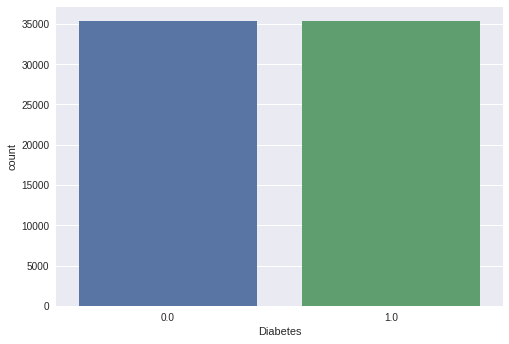

In [33]:
print(df2['Diabetes'].value_counts())
_ = sns.countplot(x='Diabetes', data=df2)

Se observa que la muestra esta balanceada 50% de personas con diabetes positiva y 50% de personas con diabetes negativa.

Text(0.5, 1.0, 'Cantidad de apariciones por grupo de edades')

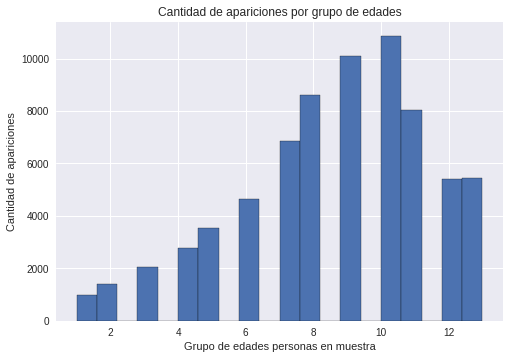

In [34]:
plt.style.use('seaborn')
df_age = df2['Age']
df_age.hist(bins = 20,
            edgecolor = 'black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Grupo de edades personas en muestra')
plt.ylabel('Cantidad de apariciones')
plt.title('Cantidad de apariciones por grupo de edades')

Se verifica que la mayor cantidad de personas en el set de datos esta agrupada en los rangos de edad 9 y 10 equivalentes a las edades 60-70 anos

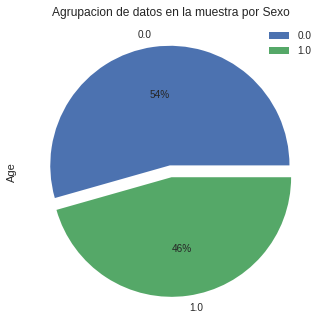

In [21]:
df2.groupby('Sex').count().plot(kind='pie',y='Age', autopct='%1.0f%%',
                                 explode =[0.05,0.05]);
plt.title('Agrupacion de datos en la muestra por Sexo');

El set de datos presenta que el 54% de las personas en referencia pertenecen al sexo femenino, mientras que el 46% corresponde al sexo masculino

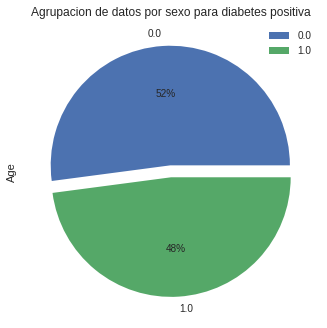

In [44]:
# verificacion de diabetes por genero
filtro = df2['Diabetes']==1.0
df_filtro = df2[filtro]
df_filtro.groupby('Sex').count().plot(kind='pie', y='Age',
                                      autopct='%1.0f%%',
                                 explode =[0.05,0.05]);
plt.title('Agrupacion de datos por sexo para diabetes positiva');

Se observa que el 48% de las personas senaladas con diabetes corresponden al sexo masculino, mientras que el 52% corresponde a personas del sexo femenino.

### Creacion de mapa de calor para identificar posibles correlaciones

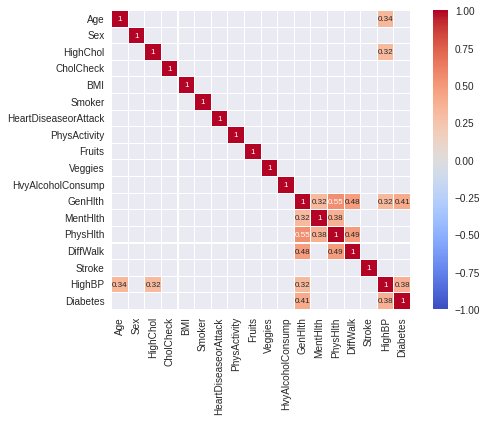

In [54]:
# se analiza el set de datos, en busca de posibles relaciones entre las distintas caracteristicas
# se tomara como parametro inicial una relacion positiva >=3 o una correlacion negativa <=-0.3
corr = df2.corr() 
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Mapa de calor para verificar correlacion solo para las personas identificadas con diabetes

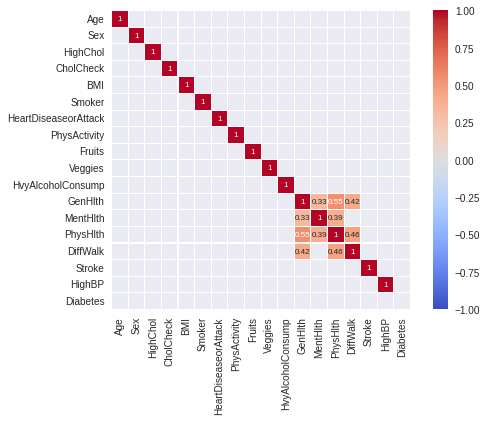

In [53]:
filtro = df2['Diabetes']==1.0
df_filtro = df2[filtro]
corr = df_filtro.corr() 
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Mapa de calor sobre las personas identificadas con diabetes negativa

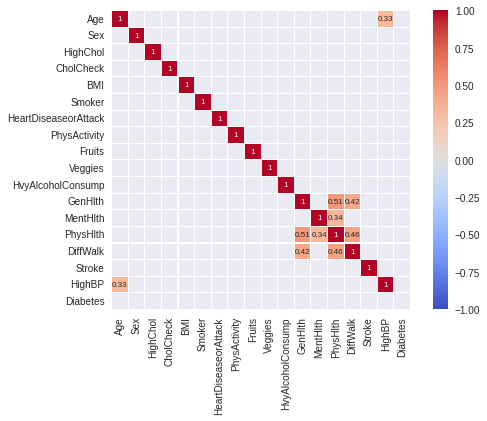

In [52]:
filtro = df2['Diabetes']==0.0
df_filtro = df2[filtro]
corr = df_filtro.corr() 
plt.figure()

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], 
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Los diferentes cuadros de calor indican correlacion entre los renglones de salud, como es de esperarse, la salud general esta influenciada por la salud mental y salud fisica. Las personas que presentan dificultad para caminar impactan en la salud fisica.

A traves del mapa de calor no se puede establecer una fuerte correlacion entre la diabetes y otros elementos como la alimentacion, alcoholismo o tabaquismo. Mas alla del valor HighBP el cual presenta una correlacion moderada con la diabetes asi como la salud general.

In [55]:
#En esta seccion are un ejercicio de scatter para ver correlacion entre distintas variables

## Modelado de datos

In [58]:
#Identificacion de matriz y target
y=df2['Diabetes']
X= df2.drop(columns=['Diabetes'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [59]:
#Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#determinacion de parametros para configuracion de los modelos a implementar

In [ ]:
#normalizar arbol de decision.

#se crea una funcion para probar todas las profundidades posibles.
#Este modelo de funcion fue tomada del ejercicio de Arbol de Regresion y ajustes
#de coding Dojo.
max_depth_range = list(range(1, 36))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train, y_train)
    score = dec_tree.score(X_test, y_test)
    r2.append(score)

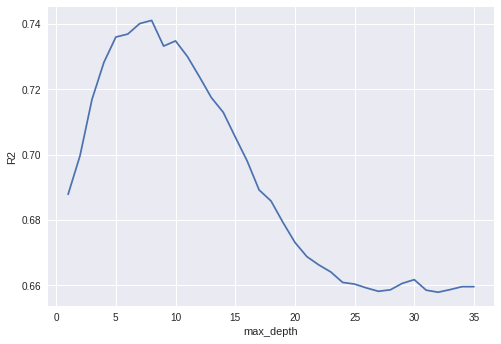

In [ ]:
#visualizar que max_depth lleva una puntuacion R2 mas alta
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

Para el arbol de decision el maximo rendimiento esta en 8 y 9

In [66]:
#KN Vecinos
#se crea una funcion para probar todas las profundidades posibles.
#Este modelo de funcion fue tomada del ejercicio de Arbol de Regresion y ajustes
#de coding Dojo.
n_vecinos = list(range(1, 10))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for vecino in n_vecinos:
    knn = KNeighborsClassifier(n_neighbors=vecino)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    score = knn.score(X_test, y_test)
    r2.append(score)

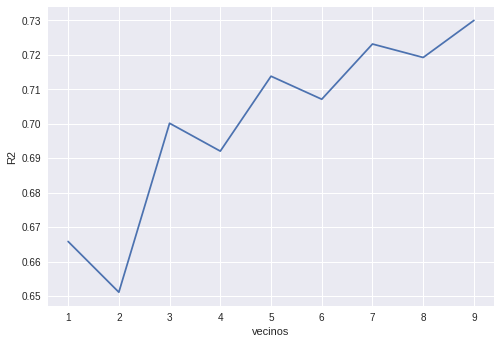

In [67]:
#visualizar que max_depth lleva una puntuacion R2 mas alta
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(n_vecinos, r2)
plt.xlabel('vecinos')
plt.ylabel('R2');

Se pretendera configurar el KNN con un numero de 9 u 11 vecinos

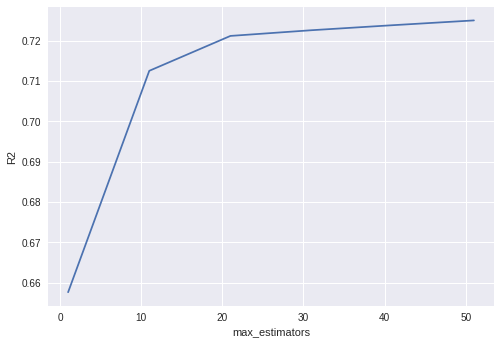

In [68]:
# configuracion para Random Forest
max_n_estimators= list(range(1, 60,10))# will try every value between 2 and 36
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for estimator in max_n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, 
                             random_state = 42)
    rf.fit(X_train, y_train)
    score = rf.score(X_test, y_test)
    r2.append(score)

#visualizar que max_depth lleva una puntuacion R2 mas alta
# Visualicen qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_n_estimators, r2)
plt.xlabel('max_estimators')
plt.ylabel('R2');

Se utilizara 50 - 55 estimadores

In [69]:
#desarrollo de los modelos
#esta extracto de codigo proviene de https://www.kaggle.com/code/prasadshingare/diabetes-hypertension-and-stroke-prediction/notebook
# se establecen configuraciones basicas a fin de verificar el rendimiento de los disintos modelo
# posteriormente se ajustaran los hiperparametros para mejorar el rendimiento cuando se ameriten.
models={
    "Logisitic Regression" :LogisticRegression(random_state=42),
    "Decision Tree" :DecisionTreeClassifier(max_depth=8,random_state=42),
    "Random Forest":RandomForestClassifier(n_estimators=55),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=11),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train Model
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred =  model.predict(X_test)

  # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) 
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') 
    model_test_precision = precision_score(y_test, y_test_pred , average='weighted') 
    model_test_recall  = recall_score(y_test, y_test_pred,average='weighted') 

  # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) 
    model_train_f1 = f1_score(y_train, y_train_pred, average= 'weighted') 
    model_train_precision = precision_score(y_train, y_train_pred,average='weighted') 
    model_train_recall = recall_score(y_train, y_train_pred,average='weighted') 

    print(list(models.keys())[i])

    print('Desempeno del modelo con datos de entrenamiento (Diabetes)')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:4f}'.format(model_train_f1))
    print('- Precision: {:4f}'.format(model_train_precision))
    print('- Recall: {:4f}'.format(model_train_recall))

    print('----------------------------------')

    print('Desempeno del modelo con datos de prueba (Diabetes)')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy) )
    print('- Fl score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))


    print('='*35)
    print('\n')

Logisitic Regression
Desempeno del modelo con datos de entrenamiento (Diabetes)
- Accuracy: 0.7478
- F1 score: 0.747727
- Precision: 0.748224
- Recall: 0.747826
----------------------------------
Desempeno del modelo con datos de prueba (Diabetes)
- Accuracy: 0.7467
- Fl score: 0.7466
- Precision: 0.7470
- Recall: 0.7467


Decision Tree
Desempeno del modelo con datos de entrenamiento (Diabetes)
- Accuracy: 0.7515
- F1 score: 0.751043
- Precision: 0.753399
- Recall: 0.751504
----------------------------------
Desempeno del modelo con datos de prueba (Diabetes)
- Accuracy: 0.7411
- Fl score: 0.7405
- Precision: 0.7433
- Recall: 0.7411


Random Forest
Desempeno del modelo con datos de entrenamiento (Diabetes)
- Accuracy: 0.9722
- F1 score: 0.972198
- Precision: 0.972229
- Recall: 0.972199
----------------------------------
Desempeno del modelo con datos de prueba (Diabetes)
- Accuracy: 0.7266
- Fl score: 0.7263
- Precision: 0.7279
- Recall: 0.7266


K-Nearest Neighbors
Desempeno del model

{0.0001: 0.6856787189498105,
 0.001: 0.7424319583545521,
 0.01: 0.7471283879364001,
 0.1: 0.7463362190912691,
 1: 0.7466757200248967,
 10: 0.7466757200248967,
 100: 0.7466757200248967,
 1000: 0.7466757200248967}

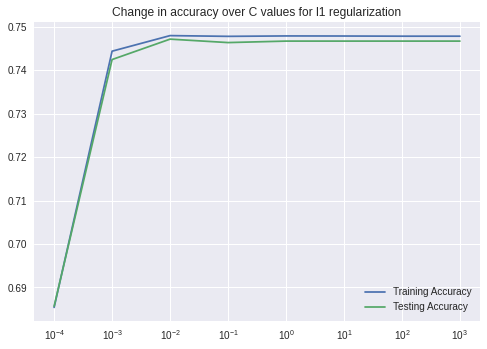

In [72]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg.score(X_train, y_train))
  test_scores.append(log_reg.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


Aplicando la regularizacion l1 con un parametro de 11 se presenta el mismo comportamiento en en el modelo de regresion logistica.